In [34]:
import os, sys
import networkx as nx
os.environ["BEEHIVE_PROJECT_ROOT"]="/home/katie/beehive_clean"
sys.path.append(os.environ["BEEHIVE_PROJECT_ROOT"] + "/cocotb_testing/common/")
from deadlock_check import TileConfig
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pygraphviz as pgv
from pathlib import Path

In [35]:
TILE_CONFIG_FILE=f"{os.environ['BEEHIVE_PROJECT_ROOT']}/sample_designs/tcp_ip_rewrite/tile_config.xml"

In [36]:
tile_config_file = open(TILE_CONFIG_FILE, "r")

In [37]:
tile_config = TileConfig(tile_config_file)

In [38]:
pos = nx.planar_layout(tile_config.graph)

NetworkXException: G is not planar.

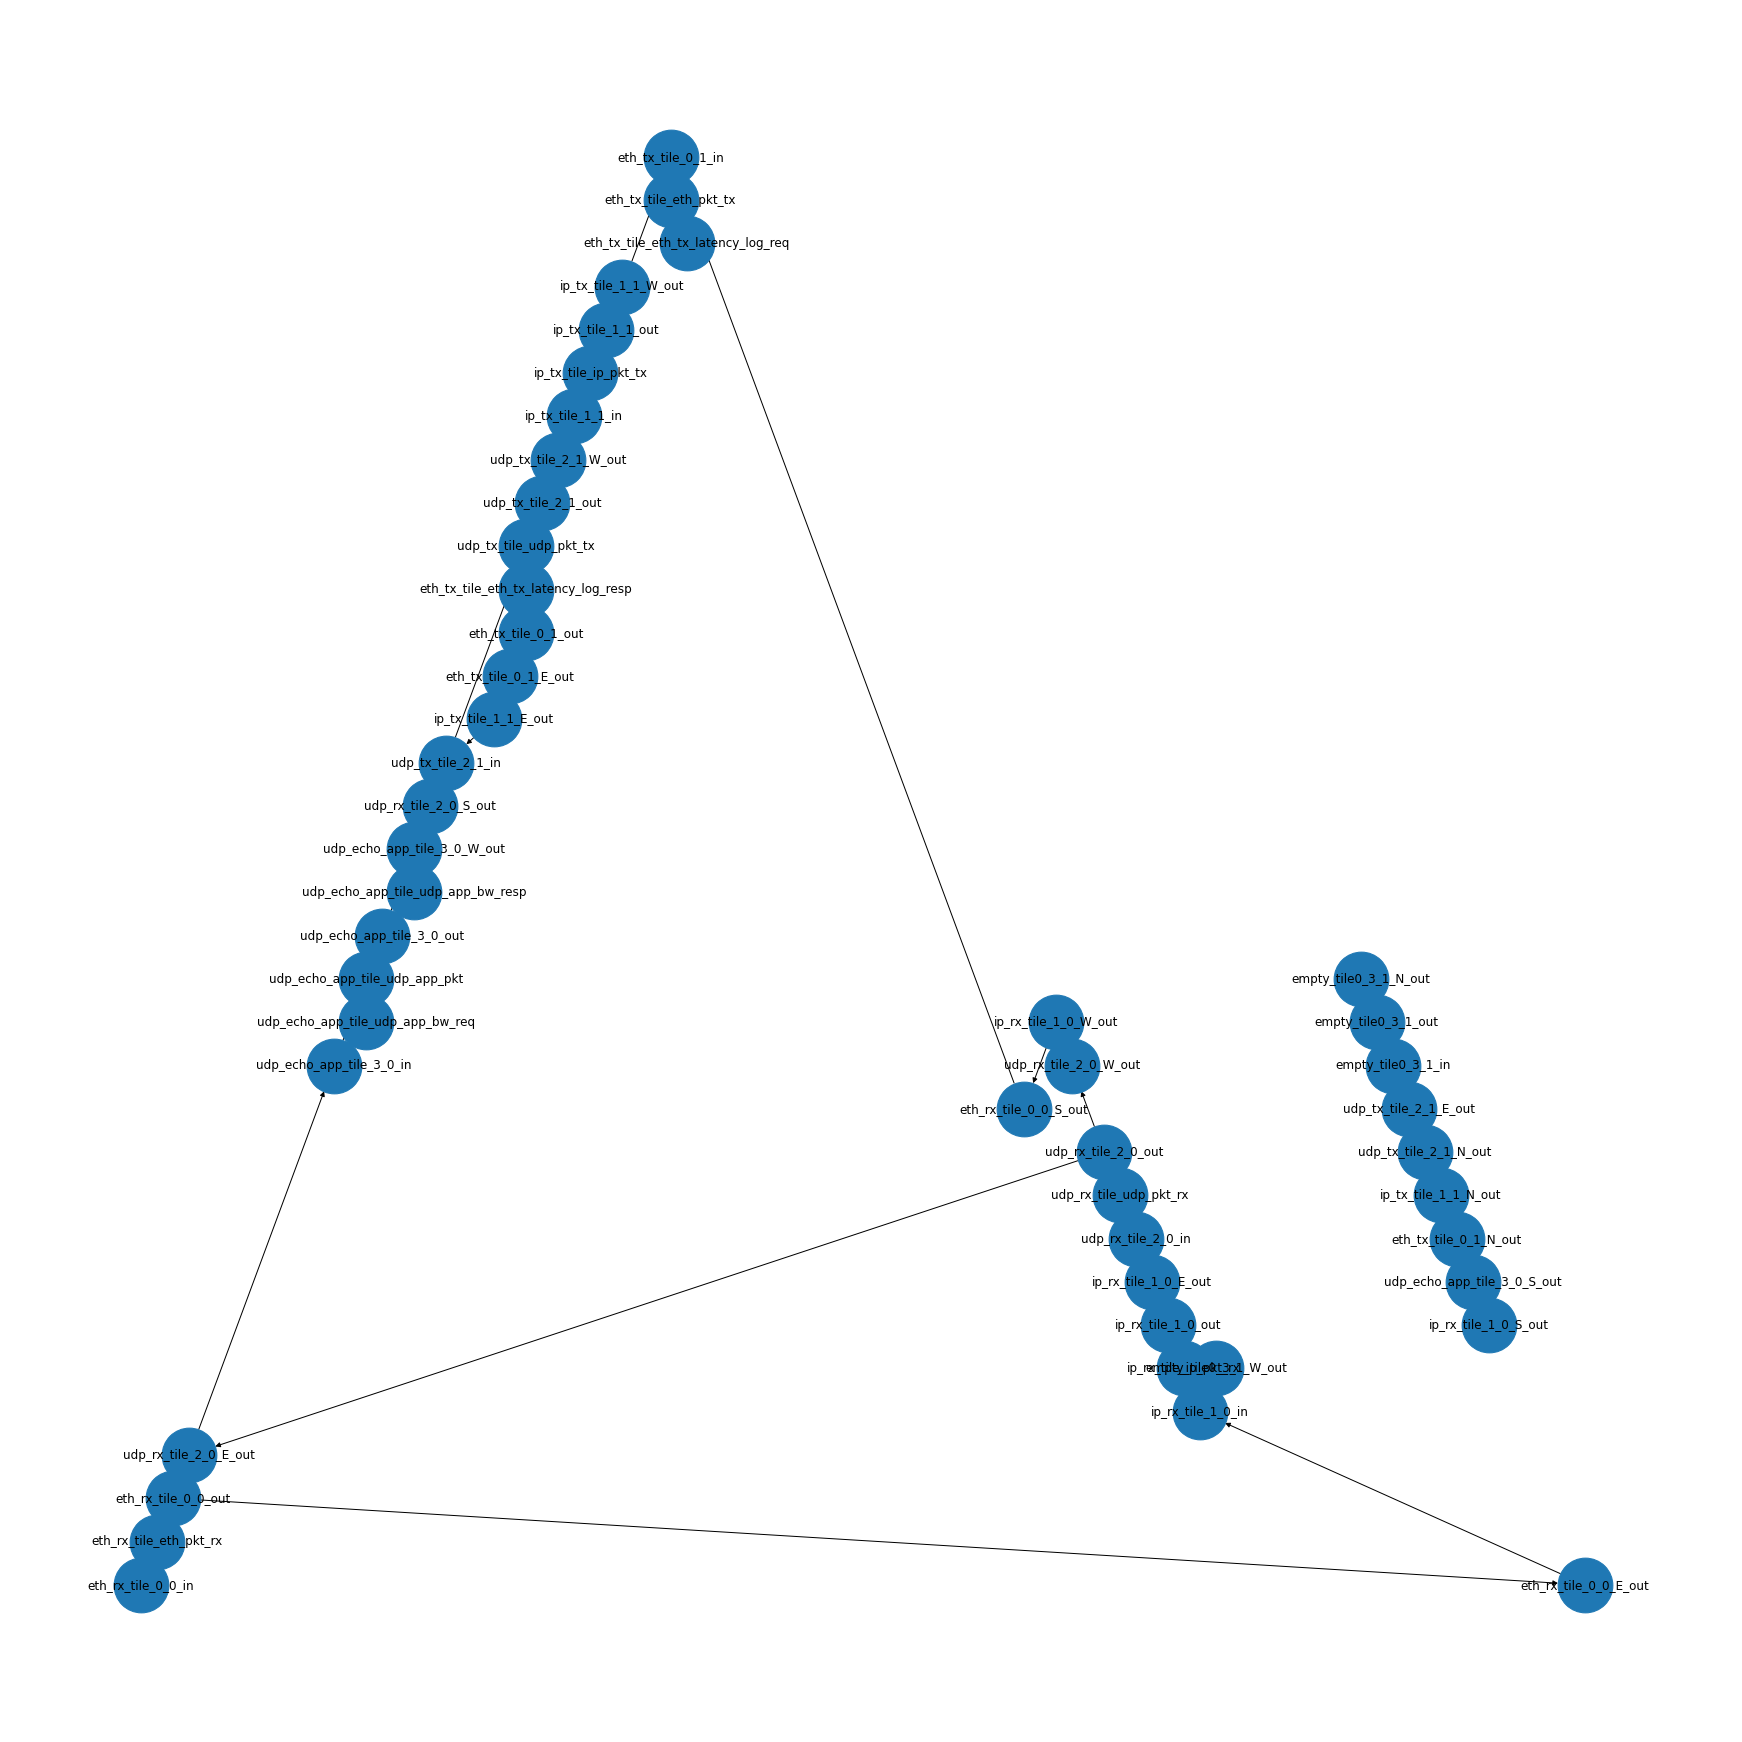

In [ ]:
plt.figure(3,figsize=(24,24)) 
nx.draw(tile_config.graph, pos=pos, with_labels=True, node_size=3000)

In [17]:
tile_config.drawDependencyGraph("./dependency_graph.png")

In [7]:
pyviz = nx.nx_agraph.to_agraph(tile_config.graph)
pyviz.graph_attr["overlap"] = "false"
pyviz.graph_attr["nodesep"] = ".4"
pyviz.node_attr["shape"] = "circle"
pyviz.node_attr["margin"] = .01

In [39]:
path = Path('./test_graph.png')
pyviz.draw(path=path, prog="neato")

NameError: name 'pyviz' is not defined

In [40]:
sorted(nx.simple_cycles(tile_config.graph))

[['dram_rx_tile_1_3_N_out',
  'tcp_rx_tile_1_2_in',
  'tcp_rx_tile_tcp_pkt_rx',
  'tcp_rx_tile_tcp_rx_mem_req',
  'tcp_rx_tile_1_2_out',
  'tcp_rx_tile_1_2_S_out',
  'dram_rx_tile_1_3_in',
  'dram_rx_tile_dram_req',
  'dram_rx_tile_1_3_out'],
 ['tcp_tx_tile_tcp_pkt_tx',
  'tcp_tx_tile_2_2_out',
  'tcp_tx_tile_2_2_S_out',
  'dram_tx_tile_2_3_in',
  'dram_tx_tile_dram_req',
  'dram_tx_tile_2_3_out',
  'dram_tx_tile_2_3_N_out',
  'tcp_tx_tile_2_2_in',
  'tcp_tx_tile_tcp_tx_mem_resp']]

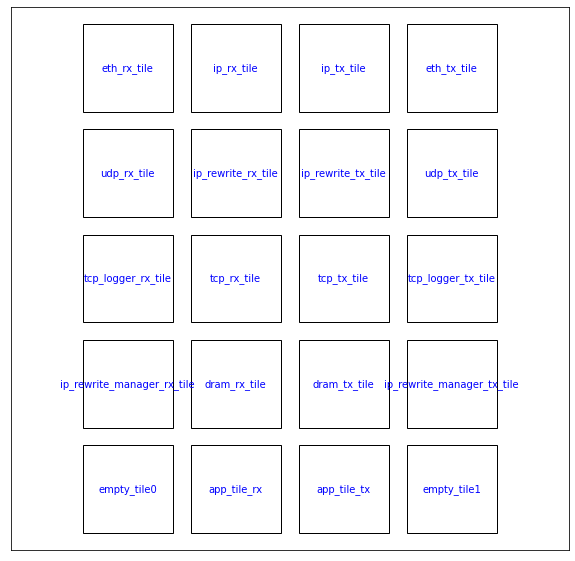

In [32]:
RECT_WIDTH = 500
RECT_HEIGHT = 500
RECT_PADDING = RECT_WIDTH * .20

fig, ax = tile_config.drawLayout(RECT_WIDTH, RECT_HEIGHT, RECT_PADDING)